# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

**DATASET DESCRIPTION**

One of the datasets explored last semester was the Prosper Loan dataset, which was found on Kaggle (https://www.kaggle.com/datasets/henryokam/prosper-loan-data/data). This dataset contains the customer's data from a loan company known as Prosper. It consists of 113,937 loans with 81 columns (features) on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 

Prosper launched in 2005 and is the first US-based peer-to-peer lending platform that allows borrowers to apply online for fixed-rate loans from $2,000 to $50,000. Peer-to-peer (P2P) lending enables an individual to obtain a loan directly from another individual, cutting out the traditional bank as the middleman.

This dataset has great potential to answer Who, What, and How questions because it comes from a real peer-to-peer lending platform and can be valuable not only for Prosper itself but also for other companies in the lending business. Like real-world data, it is large and somewhat messy, requiring preprocessing before meaningful insights can be drawn.




**WHO, WHAT, HOW OF THE DATASET**

- WHO - To whom are we communicating?
- WHAT - What do we want our audience to know or do?
- HOW -  What data is available that will help make a point?

1. **The "Who"** is Prosper’s risk management department. Since both peer-to-peer lending and traditional loans carry the risk of default, this historical dataset can provide insights into customer profiles and help evaluate borrower risk.

2. **The "What"** is the practical information the risk management department needs to identify Prosper customers who pose a significant risk to the company and the lenders using its platform. Specifically, they need to know which aspects of a customer’s profile contribute to late payments and loan defaults. By analyzing this dataset, the department can refine its risk model to limit loan amounts for higher-risk customers, such as those with a history of delinquency.

3. **The "How"** focuses on presenting the most relevant columns that can reveal customers who potentially carry significant risk to Prosper. As mentioned above, the dataset contains 81 columns, but the 10 following columns appear to be the most important for this task:
- MemberKey: The unique key that is associated with the borrower. This is the same identifier that is used in the API member object.
- LoanStatus: The current status of the loan, such as Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.
- CreditScoreRangeLower: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
- CreditScoreRangeUpper: The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. Normally, 850 is the highest credit score, but some alternative scoring systems like VantageScore, have had different ranges (VantageScore 1.0 and 2.0 could range up to 990).
- AmountDelinquent: Dollars delinquent at the time the credit profile was pulled.
- DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is capped at 10.
- LoanOriginalAmount: The origination amount of the loan.
- InquiriesLast6Months: Number of inquiries in the past six months at the time the credit profile was pulled.
- DelinquenciesLast7Years: Number of delinquencies in the past 7 years at the time the credit profile was pulled.

The year 2013 was chosen because it aligns with the post-2007-2009 financial crisis recovery period. Selecting an earlier year would introduce more skewed data, as the aftermath of the crisis significantly impacted lending behavior and default rates. Further, by comparing these historical trends in 2013 to modern lending data, the risk management department can potentially assess whether similar recovery patterns exist post-COVID, for instance, and whether borrower risk profiles have changed. The dataset’s breadth helps the department identify patterns in late payments and defaults, leading to refining its risk model. For example, if past data shows that customers with a certain credit grade is more likely to default, the model can be fine-tuned to adjust loan terms or limit lending to such profiles in the future.

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

DATASET SUMMARY BY USING INFO() AND DESCRIBE()


In [ ]:
# Since this is a large dataset, .shape and .head were used first for high-level overview of data shape and composition
loan_data = pd.read_csv("ProsperLoanData_2013.csv")
print(loan_data.shape)
loan_data.head()



(34345, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
1,0F05359734824199381F61D,1074836,26:37.1,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0F0A3576754255009D63151,750899,52:56.1,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0F1035772717087366F9EA7,768193,49:27.5,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4,0F043596202561788EA13D5,1023355,43:39.1,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34345 entries, 0 to 34344
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingKey                           34345 non-null  object 
 1   ListingNumber                        34345 non-null  int64  
 2   ListingCreationDate                  34345 non-null  object 
 3   CreditGrade                          0 non-null      float64
 4   Term                                 34345 non-null  int64  
 5   LoanStatus                           34345 non-null  object 
 6   ClosedDate                           2635 non-null   object 
 7   BorrowerAPR                          34345 non-null  float64
 8   BorrowerRate                         34345 non-null  float64
 9   LenderYield                          34345 non-null  float64
 10  EstimatedEffectiveYield              34345 non-null  float64
 11  EstimatedLoss               

Selecting the most relevant columns for analysis

In [ ]:
# The dataset has 81 columns, which is excessive for the goals of this analysis. I keep only the most relevant columns, but the dataset could be sliced in different ways
selected_columns = [
    "MemberKey","LoanStatus", "ProsperScore", "CreditScoreRangeLower",
    "CreditScoreRangeUpper", "AmountDelinquent", "DebtToIncomeRatio",
    "LoanOriginalAmount", "InquiriesLast6Months", "DelinquenciesLast7Years"
]

loan_data_updated = loan_data[selected_columns]
loan_data_updated

,MemberKey,LoanStatus,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,LoanOriginalAmount,InquiriesLast6Months,DelinquenciesLast7Years
0,36CE356043264555721F06C,Current,4,680,699,0,0.26,15000,1,0
1,874A3701157341738DE458F,Current,10,740,759,0,0.36,15000,0,0
2,AA4535764146102879D5959,Current,2,680,699,0,0.27,3000,0,0
3,737F347089545035681C074,Current,4,700,719,0,0.24,10000,3,0
4,49A53699682291323D04D66,Current,9,820,839,0,0.25,10000,1,0
...,...,...,...,...,...,...,...,...,...,...
34340,099F357317238787760B356,Current,2,680,699,0,0.28,4000,1,0
34341,CBD43555702871369F462DA,Completed,3,660,679,0,0.05,2500,2,9
34342,89A735620041442181964DB,Current,6,680,699,0,0.20,3000,0,0
34343,2EC435768441332602FDC15,Current,5,700,719,0,0.13,10000,0,7


In [5]:
# Included 33% and 66%
loan_data_updated.describe(percentiles=[0.25, 0.33, 0.50, 0.66, 0.75])


,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,LoanOriginalAmount,InquiriesLast6Months,DelinquenciesLast7Years
count,34345.000000,34345.000000,34345.000000,34345.000000,32179.000000,34345.000000,34345.000000,34345.000000
mean,5.476518,698.833018,717.833018,953.526394,0.264352,10545.065599,0.844373,3.826379
std,2.401794,44.088336,44.088336,7977.111596,0.242014,6573.172631,1.237883,9.702015
min,1.000000,600.000000,619.000000,0.000000,0.000000,2000.000000,0.000000,0.000000
25%,4.000000,660.000000,679.000000,0.000000,0.170000,4000.000000,0.000000,0.000000
33%,4.000000,680.000000,699.000000,0.000000,0.190000,6000.000000,0.000000,0.000000
50%,5.000000,700.000000,719.000000,0.000000,0.240000,10000.000000,0.000000,0.000000
66%,6.000000,720.000000,739.000000,0.000000,0.290000,13000.000000,1.000000,0.000000
75%,7.000000,720.000000,739.000000,0.000000,0.330000,15000.000000,1.000000,2.000000
max,11.000000,880.000000,899.000000,463881.000000,10.010000,35000.000000,22.000000,99.000000


CHECKING FOR DUPLICATE VALUES

In [6]:
# MemberKey column, a unique ID associated with the borrower, was included to prevent false positive duplicates
duplicates = loan_data_updated.duplicated().sum()
duplicates

np.int64(3)

In [ ]:
# The number of rows shown matches the duplicate count, as each duplicate includes its original entry (3 original rows and 3 duplicates)
duplicate_rows = loan_data_updated[loan_data_updated.duplicated(keep=False)]
duplicate_rows.head(20)

,MemberKey,LoanStatus,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,LoanOriginalAmount,InquiriesLast6Months,DelinquenciesLast7Years
3086,E48334334509567416C8C65,Completed,10,780,799,0,0.04,2000,2,0
3889,E48334334509567416C8C65,Completed,10,780,799,0,0.04,2000,2,0
19498,EF64353181017490639693E,Completed,10,740,759,0,0.02,2000,1,0
22621,CB8734679685944391611C7,Completed,7,740,759,0,NaN,2000,2,0
26459,EF64353181017490639693E,Completed,10,740,759,0,0.02,2000,1,0
33623,CB8734679685944391611C7,Completed,7,740,759,0,NaN,2000,2,0


In [8]:
# Drop duplicates based on MemberKey
loan_data_updated = loan_data_updated.drop_duplicates(subset=["MemberKey"])

# Confirm if the duplicates were actually dropped (0 indicates they were)
loan_data_updated.duplicated().sum()


np.int64(0)

MEAN, MEDIAN, AND MODE OF EACH COLUMN

In [9]:
# Selected only numeric columns because LoanStatus is a string
numeric_cols = loan_data_updated.select_dtypes(include=['number'])

# Mean, median, mode
mean_values = numeric_cols.mean()
median_values = numeric_cols.median()
mode_values = numeric_cols.mode().iloc[0]

# Summary combined in one table
summary_stats = pd.DataFrame({
    "Mean": mean_values,
    "Median": median_values,
    "Mode": mode_values
})

print(summary_stats)



                                 Mean    Median      Mode
ProsperScore                 5.459205      5.00      4.00
CreditScoreRangeLower      698.787988    700.00    660.00
CreditScoreRangeUpper      717.787988    719.00    679.00
AmountDelinquent           943.627624      0.00      0.00
DebtToIncomeRatio            0.264395      0.24      0.19
LoanOriginalAmount       10555.609030  10000.00  15000.00
InquiriesLast6Months         0.834815      0.00      0.00
DelinquenciesLast7Years      3.842720      0.00      0.00


CHECK FOR MISSING OR NULL VALUES

In [10]:
# Check for null values
missing_values = loan_data_updated.isnull().sum()

# There are 2,089 null values in DebtToIncomeRatio     
missing_values





MemberKey                     0
LoanStatus                    0
ProsperScore                  0
CreditScoreRangeLower         0
CreditScoreRangeUpper         0
AmountDelinquent              0
DebtToIncomeRatio          2089
LoanOriginalAmount            0
InquiriesLast6Months          0
DelinquenciesLast7Years       0
dtype: int64

ADDRESSING MISSING VALUES

In [11]:
# DebtToIncomeRatio has 2,089 missing values, which is a small portion (~6.5%) of the 33K rows, so they are dropped
loan_data_updated = loan_data_updated.dropna(subset=['DebtToIncomeRatio'])
loan_data_updated

,MemberKey,LoanStatus,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,LoanOriginalAmount,InquiriesLast6Months,DelinquenciesLast7Years
0,36CE356043264555721F06C,Current,4,680,699,0,0.26,15000,1,0
1,874A3701157341738DE458F,Current,10,740,759,0,0.36,15000,0,0
2,AA4535764146102879D5959,Current,2,680,699,0,0.27,3000,0,0
3,737F347089545035681C074,Current,4,700,719,0,0.24,10000,3,0
4,49A53699682291323D04D66,Current,9,820,839,0,0.25,10000,1,0
...,...,...,...,...,...,...,...,...,...,...
34340,099F357317238787760B356,Current,2,680,699,0,0.28,4000,1,0
34341,CBD43555702871369F462DA,Completed,3,660,679,0,0.05,2500,2,9
34342,89A735620041442181964DB,Current,6,680,699,0,0.20,3000,0,0
34343,2EC435768441332602FDC15,Current,5,700,719,0,0.13,10000,0,7


IDENTIFYING INCONSISTENT DATA AND OUTLIERS 

In [12]:
# Check for inconsistencies in CreditScoreRangeLower and CreditScoreRangeUpper columns
invalid_credit_scores = loan_data_updated[
    (loan_data_updated['CreditScoreRangeLower'] < 300) | 
    (loan_data_updated['CreditScoreRangeUpper'] > 850)
]

invalid_credit_scores


,MemberKey,LoanStatus,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,LoanOriginalAmount,InquiriesLast6Months,DelinquenciesLast7Years
261,F7AB358186235939866E738,Current,8,840,859,23754,0.07,3000,0,5
357,095B3582764549929E84ED3,Current,8,860,879,0,0.17,6000,1,0
473,50E535877444760567C2840,Current,8,840,859,0,0.27,8500,0,0
1305,8E1D3514112802593099EDF,Current,10,840,859,0,0.10,15000,0,0
1709,8DCC3575196944573321108,Current,9,840,859,0,0.33,13000,1,7
...,...,...,...,...,...,...,...,...,...,...
32806,4E8C3497862749139914761,Current,10,840,859,0,0.12,15000,0,0
32864,FA713575023238829248ED0,Current,10,880,899,0,0.12,13500,0,0
32926,335334121512536484F629C,Current,10,840,859,0,0.19,16500,0,0
33024,0D4735585319438862AB589,Current,7,840,859,0,0.17,3450,0,0


The result above shows that no credit scores fall below 300, but 117 rows have scores above 850. While 850 is generally the highest credit score, VantageScore 1.0 and 2.0 used a range of up to 990 between 2006 and 2013: https://www.vantagescore.com/wp-content/uploads/2022/02/VS1-2014Validation.pdf
Given the existence of this alternative scoring system, it's likely that Prosper used a broader scale, making scores above 850 not unusual in this dataset.

In [13]:
# Check for negative values
invalid_values = loan_data_updated[
    (loan_data_updated['AmountDelinquent'] < 0) |  
    (loan_data_updated['DebtToIncomeRatio'] < 0) |  
    (loan_data_updated['LoanOriginalAmount'] <= 0) |  
    (loan_data_updated['InquiriesLast6Months'] < 0) |  
    (loan_data_updated['DelinquenciesLast7Years'] < 0)
]

# No negative values found
invalid_values

,MemberKey,LoanStatus,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,LoanOriginalAmount,InquiriesLast6Months,DelinquenciesLast7Years


In [ ]:
# Compare the credit score with delinquencies in the last 7 years. It is unusual for a borrower to maintain a high credit score while having many delinquencies
high_score_delinquent = loan_data_updated[
    (loan_data_updated['CreditScoreRangeUpper'] > 750) & (loan_data_updated['DelinquenciesLast7Years'] > 10)
]


high_score_delinquent


,MemberKey,LoanStatus,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,LoanOriginalAmount,InquiriesLast6Months,DelinquenciesLast7Years
193,7CA73578742078145BAAF68,Current,6,740,759,0,0.08,35000,2,11
205,469E3588882561398F202D4,Current,7,740,759,0,0.09,6000,2,30
370,90063582927650180391B59,Current,6,740,759,0,0.38,10000,1,13
680,AEA03584569189532C4FF1C,Current,3,740,759,0,0.19,4000,0,14
712,C8EF3572755244197D85733,Current,7,760,779,0,0.33,8500,0,13
...,...,...,...,...,...,...,...,...,...,...
33173,3EF33577993557069360F4E,Current,5,780,799,0,0.15,25000,2,52
33356,8AE735848332504912A7EDA,Current,4,780,799,0,0.28,9000,0,13
33827,15FA3578612772394CE36AC,Current,4,740,759,0,0.14,25000,2,32
33867,0AB33522813649207D9D5F6,Current,7,760,779,0,0.29,8000,1,16


The table above shows a large number of delinquencies in the last 7 years. Either the DelinquenciesLast7Years value is incorrect, or the credit score is inaccurate. This goes beyond the scope of this week's task, but further investigation is needed. If this were a real task, I would have reached out to Prosper's data team regarding the DelinquenciesLast7Years value.

In [15]:
# Check for borrowers with multiple loans, which may indicate more risk to Prosper
borrower_loan_counts = loan_data_updated['MemberKey'].value_counts()
multiple_loans = borrower_loan_counts[borrower_loan_counts > 1]

# No multiple loans found
multiple_loans

Series([], Name: count, dtype: int64)

In [ ]:
# Check for inconsistencies in LoanStatus. The below output shows that there are no random values in the LoanStatus
print(loan_data_updated['LoanStatus'].unique())


['Current' 'Defaulted' 'Completed' 'Chargedoff' 'Past Due (16-30 days)'
 'Past Due (61-90 days)' 'Past Due (31-60 days)' 'Past Due (1-15 days)'
 'FinalPaymentInProgress' 'Past Due (91-120 days)' 'Past Due (>120 days)']


In [17]:
# Check for inconsistencies in LoanStatus, where a "Completed" loan still has an outstanding delinquent amount or a "Current" loan has an unusually high number of past delinquencies (>10)
invalid_status_delinquency = loan_data_updated[
    ((loan_data_updated['LoanStatus'] == 'Completed') & (loan_data_updated['AmountDelinquent'] > 0)) |
    ((loan_data_updated['LoanStatus'] == 'Current') & (loan_data_updated['DelinquenciesLast7Years'] > 10))
]

# This confirms that a "Current" loan has an unusually high number of past delinquencies
invalid_status_delinquency

,MemberKey,LoanStatus,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,LoanOriginalAmount,InquiriesLast6Months,DelinquenciesLast7Years
8,5EEA342856091111796D191,Current,4,640,659,2469,0.15,4000,1,12
18,516C36998789246407CA1E9,Current,2,680,699,0,0.14,10000,3,12
19,984D3693821243885D57B9F,Current,6,640,659,0,0.31,5000,0,52
27,F4423700140409874BD514D,Current,5,640,659,579,0.12,10000,1,18
30,6AE736964638643853D80C8,Current,7,660,679,0,0.22,10000,0,42
...,...,...,...,...,...,...,...,...,...,...
34319,01573584332511315909BBA,Current,2,680,699,0,0.12,2000,3,21
34326,1CCD3404024805654A0F709,Current,11,660,679,8463,0.29,19432,3,23
34327,BD7B369336598686599F1A1,Current,3,660,679,0,0.15,4000,2,23
34330,D93A3523886735068A6A8B3,Current,10,660,679,0,0.16,10000,1,30


In [ ]:
# Check for outliers in DelinquenciesLast7Years. The 90th percentile of past delinquencies shows the top 10% highest-risk borrowers as outliers
delinquency_threshold = np.percentile(loan_data_updated['DelinquenciesLast7Years'], 90)
print(f"top 10% high-risk cases (outliers): {delinquency_threshold}")

# The output below means that borrowers with 14 or more delinquencies in the past 7 years fall in the top 10% of highest-risk cases in the dataset

top 10% high-risk cases (outliers): 14.0


In [ ]:
# Check for borrowers with an unusually high number of recent credit inquiries (>5), even though their loan status is "Current" or "Completed"
# This may indicate more aggressive credit-seeking behavior, which potentially makes a borrower a riskier client (outliers)
high_inquiries_status = loan_data_updated[
    ((loan_data_updated['LoanStatus'] == 'Current') & (loan_data_updated['InquiriesLast6Months'] > 5)) |
    ((loan_data_updated['LoanStatus'] == 'Completed') & (loan_data_updated['InquiriesLast6Months'] > 5))
]

high_inquiries_status


,MemberKey,LoanStatus,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,LoanOriginalAmount,InquiriesLast6Months,DelinquenciesLast7Years
86,8A363534766963241C78E8E,Current,2,600,619,0,0.35,4000,6,0
308,53E23586492237515E87EF2,Current,2,680,699,0,0.15,4000,6,0
770,CBA53495321875974D3AC24,Current,6,700,719,0,0.15,15000,6,0
859,BE043696695519143A44DF9,Current,9,720,739,0,0.15,6000,6,0
867,A9B635467078576519D7B96,Current,6,720,739,63743,0.22,10000,7,53
...,...,...,...,...,...,...,...,...,...,...
33909,B1093574876336784E0BB43,Completed,3,640,659,0,0.06,4000,9,0
34009,EEC93700255051641CFB547,Current,3,760,779,0,0.23,25000,6,0
34121,B41B351315728021015B183,Current,6,700,719,0,0.26,10000,7,0
34141,A3C03383427033206BD61DA,Current,4,680,699,0,0.25,15000,6,0


The table above shows that there are some borrowers with credit-seeking behavior (258 customers), but this is not a high number compared to the overall dataset (31K).


In [ ]:
# Check for inconsistencies in ProsperScore, as it should range from 1 to 10, with 10 being the best (lowest risk)
invalid_prosper_scores = loan_data_updated[
    (loan_data_updated['ProsperScore'] < 1) | (loan_data_updated['ProsperScore'] > 10)
]

invalid_prosper_scores

,MemberKey,LoanStatus,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,LoanOriginalAmount,InquiriesLast6Months,DelinquenciesLast7Years
83,43443538011492538263F52,Current,11,820,839,0,0.14,9000,0,0
165,2ABB37017624014278BA62A,Current,11,820,839,0,0.04,20000,0,0
192,0D0B3699945473890DD1FF0,Current,11,740,759,0,0.22,30000,0,0
215,D73C3389408741606567395,Current,11,720,739,0,0.25,15000,1,0
244,21C035762591985762C39E4,Current,11,740,759,0,0.41,15000,0,0
...,...,...,...,...,...,...,...,...,...,...
34273,DE9B3433084858827656644,Current,11,660,679,0,0.35,15000,4,0
34297,86443462485489035F9068F,Current,11,740,759,0,0.23,25000,2,0
34306,C33234244295788446A33DB,Current,11,720,739,0,0.30,15000,0,0
34326,1CCD3404024805654A0F709,Current,11,660,679,8463,0.29,19432,3,23


The table above shows that a ProsperScore of 11 is inconsistent. In a real-world scenario, I would verify this data (it could be a placeholder or an internal category). If verification is not possible, I would document this issue and drop these rows since they don't align with the expected model parameters.

In [21]:
# Check for inconsistencies and outliers in DebtToIncomeRatio. 
# To define thresholds for DebtToIncomeRatio, a guide from Chase was used: https://www.chase.com/personal/credit-cards/education/basics/what-is-debt-to-income-ratio-and-why-it-is-important? 
# 35% or less: Viewed favorably; indicates good debt management
# 36% to 41%: Acceptable, managemeable level
# 42% to 49%: Nearing unmanageable levels of debt relative to your income
# 50% or more: Financial struggle to egularly meet all debt obligations


# Define ranges for DebtToIncomeRatio
bins = [0, 0.35, 0.41, 0.49, 0.5, 1, 2, 5, 10, 1001]

labels = [
    "0 - 35%",
    "36 - 41%",
    "42 - 49%",
    "> 50%",
    "100%",
    "101 - 200%",
    "201 - 500%",
    "501 - 1000%",
    "> 1000%"
]

loan_data_updated["DebtToIncomeRatio_Threshold"] = pd.cut(
    loan_data_updated["DebtToIncomeRatio"], bins=bins, labels=labels, include_lowest=True
)

# Count occurrences of each category
dti_summary = loan_data_updated["DebtToIncomeRatio_Threshold"].value_counts().sort_index()

dti_summary





DebtToIncomeRatio_Threshold
0 - 35%        25224
36 - 41%        2920
42 - 49%        1973
> 50%            138
100%             980
101 - 200%        45
201 - 500%        11
501 - 1000%       11
> 1000%            8
Name: count, dtype: int64

Analysis of DebtToIncomeRatio has demonstrated that:
- 85% borrowers have manageable debt levels, posing low risk. 
- 6% (36-49% DTI) are moderate risk; approvals may require stricter terms.
- 138 borrowers (>50% DTI) indicate high financial strain and increased default risk.
- 980 borrowers (100% DTI) are at critical risk, spending all income on debt payments.
- 75 borrowers (>100% DTI) exceed income in debt obligations, including 8 with 1000%+ DTI.

Thus, these 75 borrowers are very unusual. The high percentages could indicate data errors, so the best course of action is to verify them first (which would have been done in real life). It is common for income to be underreported or just outdated. If the percentages are accurate, then a proposal to divest (end the relationship) should be considered or the available loan amount should be reduced. Borrowers with over 100% are either clear outliers or also have outdated/incorrect income information.

Borrowers with a DTI of 50% or higher should undergo additional monitoring, as they show signs of early delinquency. 




ENCODING A CATEGORICAL VARIABLE (E.G. WITH ONE-HOT ENCODING)

In [22]:
# One-hot encode LoanStatus
loan_data_updated = pd.get_dummies(loan_data_updated, columns=['LoanStatus'])
loan_status_cols = [col for col in loan_data_updated.columns if col.startswith('LoanStatus_')]

# Convert the LoanStatus columns to integers
loan_status_numeric = loan_data_updated[loan_status_cols].astype(int)

loan_status_numeric.head()


,LoanStatus_Chargedoff,LoanStatus_Completed,LoanStatus_Current,LoanStatus_Defaulted,LoanStatus_FinalPaymentInProgress,LoanStatus_Past Due (1-15 days),LoanStatus_Past Due (16-30 days),LoanStatus_Past Due (31-60 days),LoanStatus_Past Due (61-90 days),LoanStatus_Past Due (91-120 days),LoanStatus_Past Due (>120 days)
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [23]:
# Count values in each column
# This shows occurrences of each loan status, helping to identify class imbalances in the dataset and better understand loan risk
loan_status_numeric.sum().to_frame(name="Count")

,Count
LoanStatus_Chargedoff,256
LoanStatus_Completed,1991
LoanStatus_Current,28173
LoanStatus_Defaulted,34
LoanStatus_FinalPaymentInProgress,88
LoanStatus_Past Due (1-15 days),318
LoanStatus_Past Due (16-30 days),105
LoanStatus_Past Due (31-60 days),139
LoanStatus_Past Due (61-90 days),103
LoanStatus_Past Due (91-120 days),98


# CONCLUSIONS

HW2 provided clear questions for the conclusion. Multiple observations were made throughout the analysis, but this final section will focus only on the HW2 questions:

- Are the data usable?  If not, find some new data!

Yes, the dataset is usable after cleaning, but certain inconsistencies, such as ProsperScore = 11, extreme delinquencies and debt-to-income ratio were found and recorded.

- Do you need to modify or correct the data in some way?

Yes, I identfied ProsperScore outliers, converted LoanStatus into numerical format and addressed missing values and duplicates by dropping those rows.

- Is there any class imbalance?  (Categories that have many more items than other categories). 

Yes, most loans are "Current", while categories like "Defaulted" and "Past Due (>120 days)" are much smaller. We shouldn't expect a large number of "Defaulted" values, but technically this is indicating a class imbalance.


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

<>:36: SyntaxWarning: invalid escape sequence '\i'
<>:37: SyntaxWarning: invalid escape sequence '\i'
<>:36: SyntaxWarning: invalid escape sequence '\i'
<>:37: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_4001/2619834763.py:36: SyntaxWarning: invalid escape sequence '\i'
  ax.text(0.0, 31, "BEFORE program, the \nmajority of children felt \njust $\it{OK}$ about science", fontsize=15, color="gray")
/tmp/ipykernel_4001/2619834763.py:37: SyntaxWarning: invalid escape sequence '\i'
  ax.text(4.5, 20, "AFTER\nprogram,\nmore children\nwere $\it{Kind}$ $\it{of}$ \n$\it{interested}$ & \n$\it{Excited}$ about\nscience.", fontsize=15, color="blue")


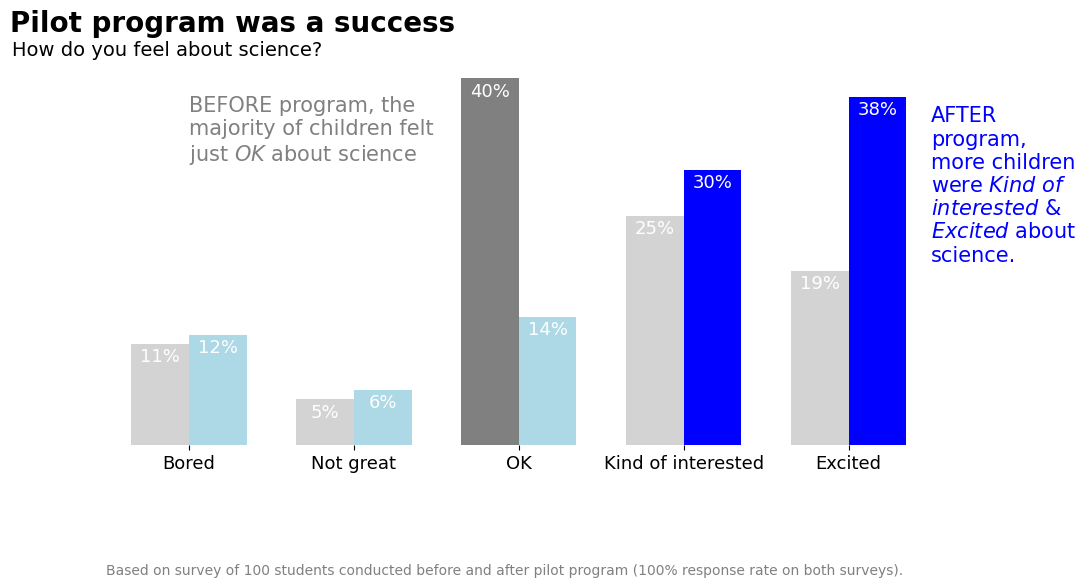

In [24]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", SyntaxWarning)

categories = ["Bored", "Not great", "OK", "Kind of interested", "Excited"]
before = [11, 5, 40, 25, 19]  
after = [12, 6, 14, 30, 38]  

x = np.arange(len(categories)) 
bar_width = 0.35 


# Highlight key bars (40, 30, 38) with bold colors
before_colors = ["lightgray", "lightgray", "gray", "lightgray", "lightgray"]
after_colors = ["lightblue", "lightblue", "lightblue", "blue", "blue"]

# Figure and axis
fig, ax = plt.subplots(figsize=(11, 5))

# Plot bars with different colors
bars_before = ax.bar(x - bar_width/2, before, bar_width, label="Before", color=before_colors)
bars_after = ax.bar(x + bar_width/2, after, bar_width, label="After", color=after_colors)

ax.set_yticks([]) 
for spine in ax.spines.values():
    spine.set_visible(False)  

# Titles
plt.suptitle("Pilot program was a success", fontsize=20, fontweight="bold", x=0.05, ha="left") 
ax.set_title("How do you feel about science?", fontsize=14,  x=-0.095, ha="left", pad = 2)  

# Labels
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=13) 
# Legend
ax.text(0.0, 31, "BEFORE program, the \nmajority of children felt \njust $\it{OK}$ about science", fontsize=15, color="gray")
ax.text(4.5, 20, "AFTER\nprogram,\nmore children\nwere $\it{Kind}$ $\it{of}$ \n$\it{interested}$ & \n$\it{Excited}$ about\nscience.", fontsize=15, color="blue")

# Add numbers to the bars
def addlabels(ax, bars, color="white"):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height - 2, 
                f"{height}%", ha='center', fontsize=13, color=color)

addlabels(ax, bars_before, color="white")  
addlabels(ax, bars_after, color="white")  

# Additionall description
plt.figtext(0.5, -0.15,  
    "Based on survey of 100 students conducted before and after pilot program (100% response rate on both surveys).", 
    ha="center", fontsize=10, color="gray")

# Show the chart
plt.show()